# Analysis of Hourly Elspot Data

This notebook will use hourly nordic elspot data for 2016 from Nordpool and the forcasting tool Prophet to investigate trends and seasonalities in the elspot price. 

Prices are in EUR/MWH



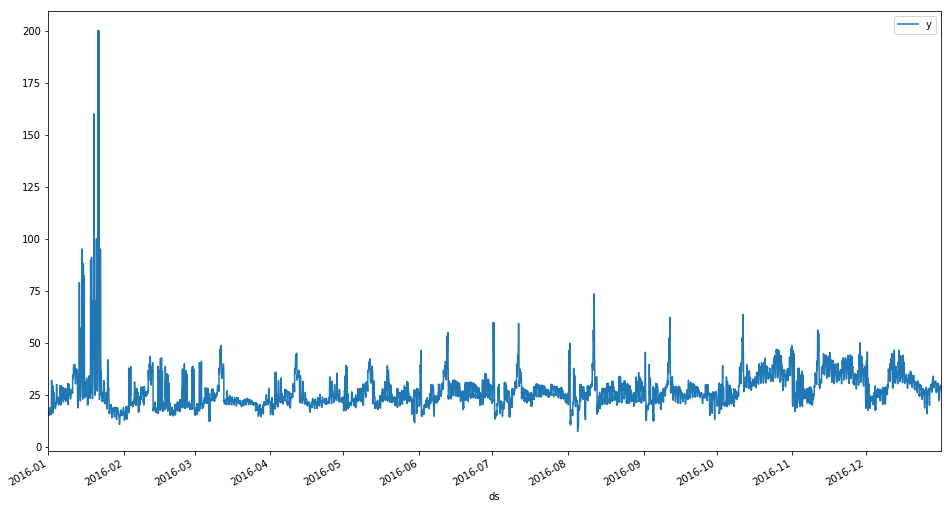

In [12]:
%matplotlib inline 
import pandas as pd
import numpy as np
from fbprophet import Prophet

# Read dataset from csv
df = pd.read_csv('../datasets/elspot-prices_2016_hourly_eur.csv', parse_dates={'datetime': ['Date', 'Time']})

# Select desired data and format into format Prophet expects
area = 'SYS'
df = df[['datetime',area]]
df = df.rename(columns={'datetime': 'ds', area: 'y'})

df.set_index('ds').plot(figsize=(16,9))

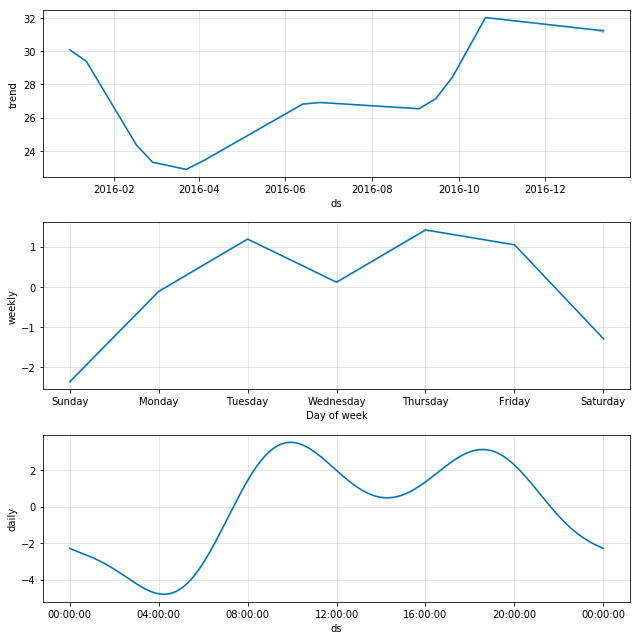

In [14]:
# Initialise prophet and input data
m = Prophet(changepoint_prior_scale=0.01, yearly_seasonality=False)
m.fit(df)
#m.params

# Specify timeinterval to forecast
future_data = m.make_future_dataframe(periods=240, freq='H')
forecast = m.predict(future_data)

m.plot_components(forecast);

Some intresting points to take from this data is the double daily peak and the deep trough at night. It is the daily variation which is the most contributing factor to the regular variation in electricity price.  

There are also large price peaks occuring at irregular time intervals, the triggers for these needs to be investigated further. 

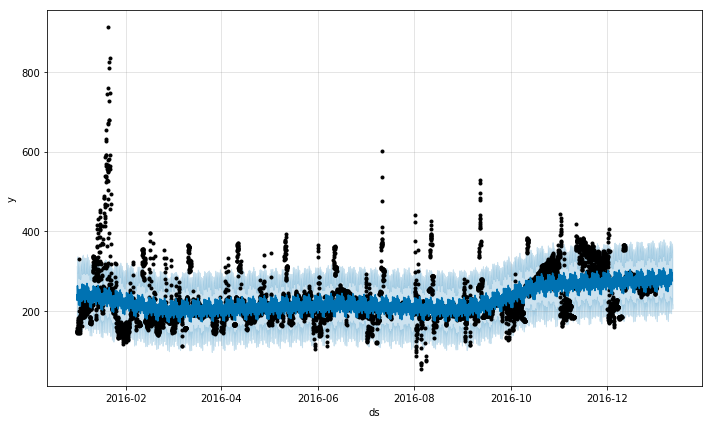

In [3]:
m.plot(forecast);